In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/placement (3).csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package(in lpa)')

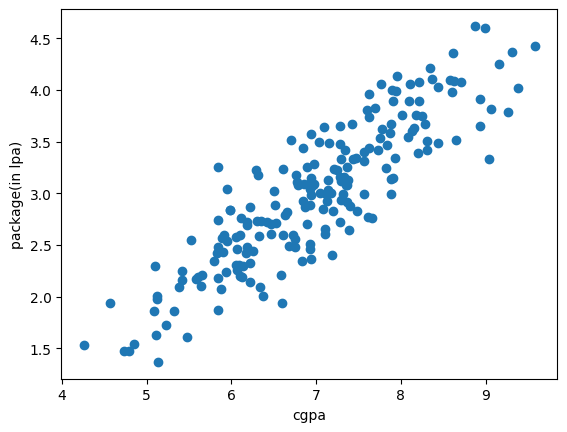

In [3]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package(in lpa)')

In [4]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1 ]
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'package(in lpa)')

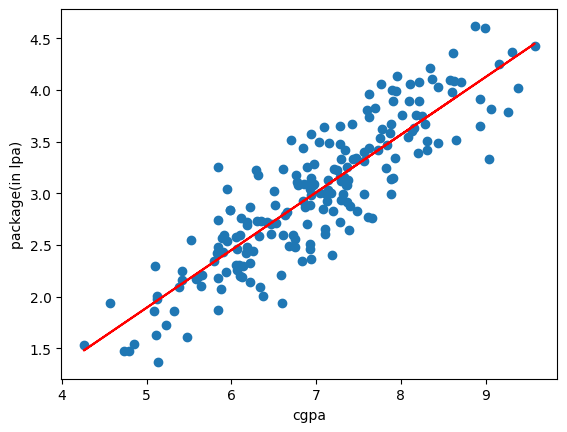

In [7]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color = 'red')
plt.xlabel('cgpa')
plt.ylabel('package(in lpa)')

# **MAE|MSE|RMSE|R2_Score**

In [8]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [9]:
y_pred = lr.predict(X_test)
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [10]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [11]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [12]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [13]:
print("R2_Score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2_Score 0.780730147510384


# **Adjusted R2_Score**

In [14]:
X_test.shape

(40, 1)

In [15]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

# **Add new Feature**


In [18]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)
new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.192597,3.26
1,5.12,0.313033,1.98
2,7.82,0.566507,3.25
3,7.42,0.994873,3.67
4,6.94,0.898897,3.57


Text(0, 0.5, 'package(in lpa)')

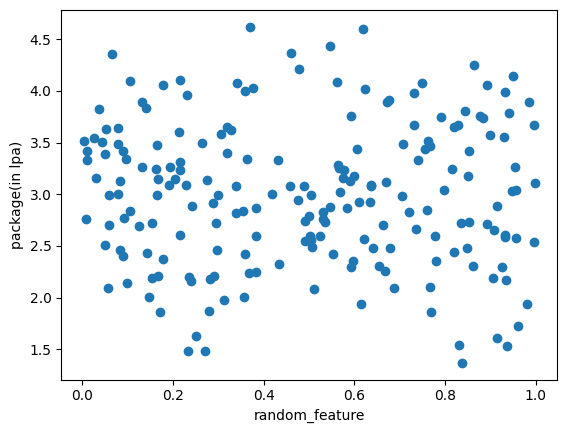

In [19]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('package(in lpa)')

In [20]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1 ]
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2_Score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2_Score 0.7864180183284313


In [24]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7748730463461844

# **Add another new feature**

In [26]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package']+(np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa','iq','package']]
new_df2.head()

,cgpa,iq,package
0,6.89,4.06,3.26
1,5.12,1.88,1.98
2,7.82,2.05,3.25
3,7.42,2.87,3.67
4,6.94,2.87,3.57


Text(0, 0.5, 'package(in lpa)')

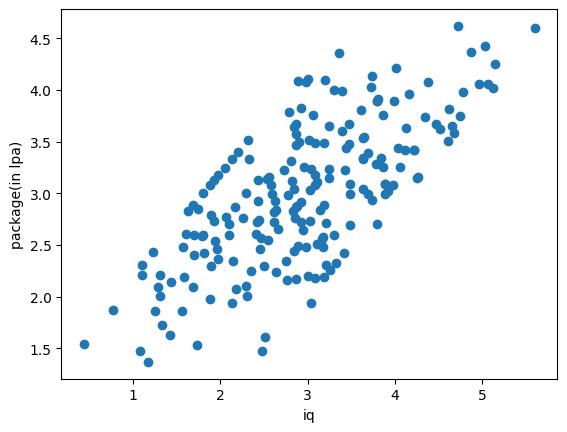

In [30]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('package(in lpa)')

In [31]:
np.random.randint(-100,100)

49

In [36]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1 ]
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [38]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2_Score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2_Score 0.8054503737769624


In [39]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7949341777649063